<a target="_blank" href="https://colab.research.google.com/github/BenjaminHerrera/MAT422/blob/main/HW_3.3.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# HW 3.3
# Benjamin Herrera
# 20 OCT 2024

# ⚠️ Run these commands prior to running anything

In [2]:
!pip install scipy
!pip install matplotlib
!pip install numpy

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.8 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------------- 59.7/59.7 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/44.8 MB 6.8 MB/s eta 0:00:07
    --------------------------------------- 0.7/44.8 MB 7.4 MB/s eta 0:00:06
   - -------------------------------------- 1.2/44.8 MB 8.5 MB/s eta 0:00:06
   - -------------------------------------- 1.8/44.8 MB 9.3 MB/s eta 0:00:05
   -- ------------------------------------- 2.3/44.8 MB 9.8 MB/s eta 0:00:05
   -- ------------------------------------- 2.8/44.8 MB 10.1 MB/s eta 0:00:05
   --- ------------------------------------ 3.4/44.8 MB 10.3 MB/s eta 0:00:05
   --

## ⚠️🛂🏠 Necessary and Sufficient Conditions of Local Minimizers

We always try to minimize something. For example, budgets! We want to figure out how to limit spending for things that are wants rather than needs (e.g., spending nearly a grand on Genshin Impact 🥲). In a mathematical sense, we do this via:

$$\min_{x\isin \Reals^d} f(x)$$

where $f$ is some function that maps some input $X$ of $\Reals^d$ to some scalar value. In the case of the function above, we can map my former gaming addiction with inputs comprising of the amount of money I spent on different video games (e.g., Genshin Impact, Honkai Star Rail, CS:GO, Valorant, etc.) to a scalar value that tells me how efficient my "fun" spending is. If I am spending more than my needs, then the value of $f(x)$ is going to be as close to 1 as much as possible. If I don't spend anything on video games, I have a value of 0. Ideally, we want to limit our spending as close to zero as much as possible as stated earlier:

>  We want to figure out how to limit spending for things that are wants rather than needs

So, our optimal input for this function to get a really low values is a budget of \$0 spent across Genshin Impact, Honkai Star Rail, CS:GO, and Valorant. This can be represented as a vector $\{0, 0, 0, 0\}$. We call this input $x*$, the global minimizer (for extra context, $x* \isin \Reals^d$ where $d = 4$ in our example). In other words, $f(x) \geq f(x^*)$ for all possible inputs in $\Reals^d$.

However, examples like this are not always trivial. For example, more complicated functions like the loss function mapped for a arbritrary neural network over some sort of image classification task will have a global minimizer that is very hard to pinpoint. Despite this, there is always a local minimizer. In other words, there is some point $x*$ where $f(x) \geq f(x*)$ for all possible points of $x$ that is in the r-ball of $x*$ by some error threshold $\sigma$. Let's take a visual look at this:

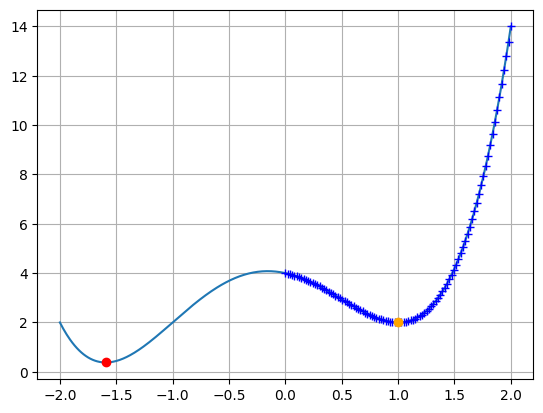

In [15]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Get the outputs for the function
x = np.linspace(-2, 2, 400)
f = lambda x: (((x - 1)**2) * (x + 1) * (x + 2)) + 2
y = f(x)

# NOTE: I found the global and local minima using Desmos
# Get the local and global minima
a = f(1)
global_min = f(-1.59307)

# Create a segment to show the r-ball
segment_x = np.linspace(0, 2, 100)
segment_y = f(segment_x)

# Plot the visualization
plt.plot(x, y, label='Function')
plt.scatter([-1.59307], [global_min], color='red', zorder=5)
plt.scatter([1], [a], color='orange', zorder=5)
plt.plot(segment_x, segment_y, 'b+')
plt.grid(True)
plt.show()


In this above sample here, we see a plot for $f(x) = (x-1)^2(x+1)(x+2) + 2$. The red point represents the global minimum for the function, while the orange point is a local minimum. We represent the error threshold $\sigma$ around the local minimum in blue crosses to show what this r-ball looks like projected onto this function. For this matter, the radius is 1.

Now, as I have stated previously... 

> more complicated functions like the loss function mapped for a arbritrary neural network over some sort of image classification task will have a global minimizer that is very hard to pinpoint

there is a way to get to some minimum given some point in the graph. In factt, machine learning heavily relies upon this notion to get neural networks to learn. This is done by setting some point randomly across the entire function landscape and iteratively find a direction of the input value to get a lower value, each time. In fact, this concept is called descent direction. In mathematical notations (quoting from the chapter), given a starting point $x'$, we want a direction vector $v$ and some scale factor $a*$ to $\min f(x)$. In other words:

$$f(x' + a v) < f(x')$$

where all of $a$ is in the range of 0 to $a*$, exclusive. This will allow us to define future ways of descinding later down the road.

Speaking of later down the road, we can use partial derivatives to do just that. In fact, we just need to find the rate of change with respect to the direction vector! In other words (quoting from the chapter):

$$\frac{\partial f(x')}{\partial v} = \nabla f(x')^T v < 0$$

This notation pretty much finds a gradient of the function at a certain point across the function landscape. This is then normed with the direction vector to get a negative scalar. We want this negative scalar becuase that defines our descent path. Now, this will only work for finding the local minimum, unfortunately (Sorry if this got your hopes up for find the global minimum). Why? because if the starting point $x'$ is the local minimizer, then the gradient is 0. If the gradient is 0, then there is no movement to continue to get the minimum because we're already at the minimum! We call this the first-order necessary condition.  

Showing the plot again from the above code example...

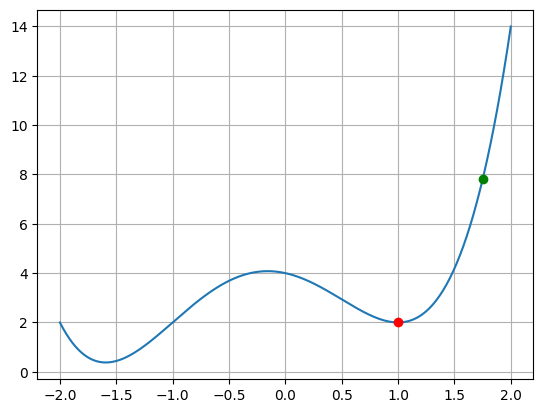

In [19]:
# Get the outputs for the function
x = np.linspace(-2, 2, 400)
f = lambda x: (((x - 1)**2) * (x + 1) * (x + 2)) + 2
y = f(x)

# NOTE: I found the global and local minima using Desmos
# Get the local and global minima
a = f(1)
b = f(1.75)

# Plot the visualization
plt.plot(x, y, label='Function')
plt.scatter([1], [a], color='red', zorder=5)
plt.scatter([1.75], [b], color='green', zorder=5)
plt.grid(True)
plt.show()

we see that the red point is the local minimum and the green point is our starting point. If we were to find the direction vector/gradient for this set of starting conditions, we can see that it will go to the left direction. Since it is far up in the curve, this direction magnitude is going to be huge.

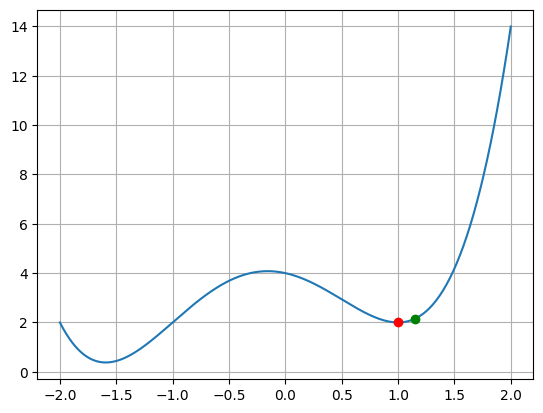

In [20]:
# Get the outputs for the function
x = np.linspace(-2, 2, 400)
f = lambda x: (((x - 1)**2) * (x + 1) * (x + 2)) + 2
y = f(x)

# NOTE: I found the global and local minima using Desmos
# Get the local and global minima
a = f(1)
b = f(1.15)

# Plot the visualization
plt.plot(x, y, label='Function')
plt.scatter([1], [a], color='red', zorder=5)
plt.scatter([1.15], [b], color='green', zorder=5)
plt.grid(True)
plt.show()

Now in this example, the starting point is very near to the local minimum. The direction vector/gradient is going to be shorter because the derivative at this point is going to be smaller. That means we'll progress slower toward the red point in future iterations. 

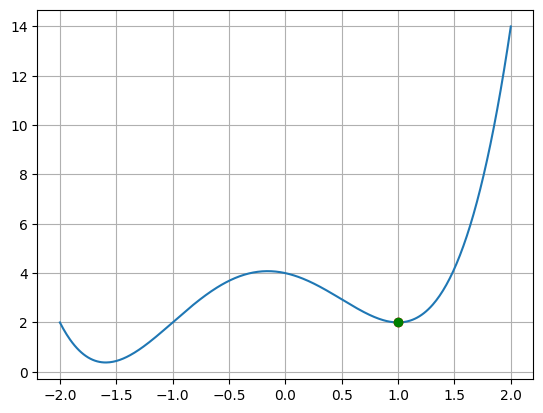

In [22]:
# Get the outputs for the function
x = np.linspace(-2, 2, 400)
f = lambda x: (((x - 1)**2) * (x + 1) * (x + 2)) + 2
y = f(x)

# NOTE: I found the global and local minima using Desmos
# Get the local and global minima
a = f(1)
b = f(1)

# Plot the visualization
plt.plot(x, y, label='Function')
plt.scatter([1], [a], color='red', zorder=5)
plt.scatter([1], [b], color='green', zorder=5)
plt.grid(True)
plt.show()

Now the starting point is at the local minimum! The direction vectors and gradients are now 0 because they're already at their destination! 

There's also another concept call the second-order necessary condition which states that if the starting point $x'$ is at the local minimum, then the hessian of the function satisfies (quoting from the chapter): $x^T H x \geq 0$ for all $x$ in $\Reals^d$.

## 🌈🌎📉 Convexity and Global Minimizers

Convexity plays a key role in finding global minimizers. In fact, we can only find such minimums in convex segments. In the previous ideas, they were very useful for finding the local minimizers for a given function. Now we are concered for finding a global minimizer. To kick a good understanding of how we can get here, let's bring the notion of convex sets. In a convext set, if we have two points $a$ and $b$, I want to be able to make a line from these two points and be able to select points across this entire line, all while being inside some $D \subseteq \Reals^d$. In other words: 

$$(1 - \alpha)a + \alpha b \isin D$$

Now let's apply this to functions. Instead of points $a$ and $b$, we simply state $f(a)$ and $f(b)$ like so:

$$(1 - \alpha)f(a) + \alpha f(b) \isin D$$

However, we want to find a function that satisfies:

$$f((1 - \alpha)a + \alpha b) \leq (1 - \alpha)f(a) + \alpha f(b) $$

In other words, if I draw a line from input range $a$ to $b$, I better not see something blocking my path when I draw that straight af line. Let's visualize what this could look like 🤗.

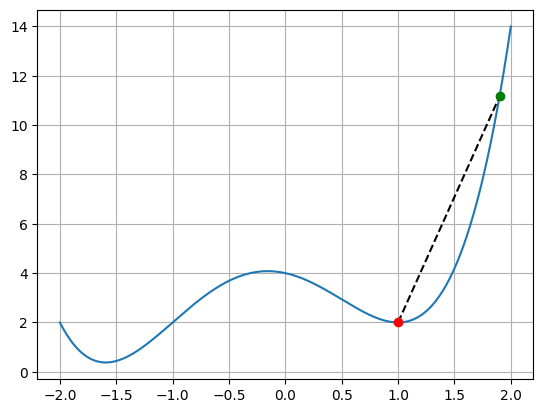

In [27]:
# Get the outputs for the function
x = np.linspace(-2, 2, 400)
f = lambda x: (((x - 1)**2) * (x + 1) * (x + 2)) + 2
y = f(x)

# Make points a and b
a = f(1)
b = f(1.90)

# Plot the visualization
plt.plot(x, y, label='Function')
plt.scatter([1], [a], color='red', zorder=5)
plt.scatter([1.90], [b], color='green', zorder=5)
plt.plot([1, 1.90], [a, b], color='black', linestyle='--')
plt.grid(True)
plt.show()

In the above example, we see that point $a$ is represented in a red dot, while point $b$ is represented in a green dot. And between them, we see a dashed black line. We know for a fact that the segment between these two points in the function landscape is convext because these two points' line of sight isn't obstructed. 

On the otherhand...

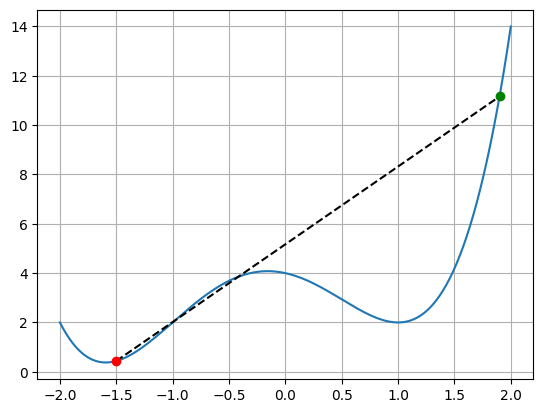

In [28]:
# Get the outputs for the function
x = np.linspace(-2, 2, 400)
f = lambda x: (((x - 1)**2) * (x + 1) * (x + 2)) + 2
y = f(x)

# Make points a and b
a = f(-1.5)
b = f(1.90)

# Plot the visualization
plt.plot(x, y, label='Function')
plt.scatter([-1.5], [a], color='red', zorder=5)
plt.scatter([1.90], [b], color='green', zorder=5)
plt.plot([-1.5, 1.90], [a, b], color='black', linestyle='--')
plt.grid(True)
plt.show()

this is not a convex segment. Why? because that lil bump on x = -0.5 is blocking the path for that line of sight dashed line (ah hell nah, ts aint convex 💀). 

Remember how we have first order and second order conditions in the previous section? Well it applies here, too. For the first-order convexity condition, it is written as: 

$$f(a) \geq f(b) + \nabla f(b)^T (a-b)$$

In other words, we can tell if $f$ is convex if point $a$ is greater than point $b$ with the gradient of $f$. 

For second-order convexity condition, it is said that $f$ is convex if the hessian of the function satisfies $x^T H x \geq 0$ for all $x$ in $\Reals^d$. To make these conditions sufficient in a general case, if the gradient of $f$ at the starting point is 0, then that starting point is a strict local minimizer.

## 🗻✨📉 Gradient Descent

Apply everything we learned, we can define an iterative optimization algorithm to get the local minimum for a function. This is called gradient descent. In fact, this idea is such a critical aspect towards neural networks in back propagation. Later works have expanded on this notion like the Adam learning algorithm. This entire idea stills falls in the concept of:

$$\min_{x\isin \Reals^d} f(x)$$

To get a sense of understanding to descent the steepest, we find a descent vector $v$ that satisfies:

$$\frac{\partial f(x)}{\partial v} \geq \frac{\partial f(x)}{\partial v^{\circ}}$$

where $v^{\circ} =$ 

$$-\frac{\nabla f(x)}{||\nabla f(x)||}$$

A good example of this in neural networks where we have some loss function defined as $f(X)$ and where $X$ is the dataset split to evaluate the model's performance. When we want to update the weights of the model, we find some vector that can change the directions of the weights in every later. This will ultimately change the prediction process for the given $X$ and in the next iteration, the loss value is lowered.